In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
# load X and Y from the keras mnist datasets
(XTrain,YTrain),(XTest,YTest)=keras.datasets.mnist.load_data()

In [51]:
XTrain.shape

(60000, 28, 28)

In [52]:
# feature scaling to improve accuracy
XTrain=XTrain/255
XTest=XTest/255

In [53]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(XTrain,YTrain,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2198 - accuracy: 0.9331
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1018 - accuracy: 0.9695
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0736 - accuracy: 0.9773
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0582 - accuracy: 0.9824
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0496 - accuracy: 0.9851


In [54]:
model.evaluate(XTest,YTest)

313/313 [==============================] - 1s 3ms/step - loss: 0.0822 - accuracy: 0.9781


[0.08221310377120972, 0.9781000018119812]

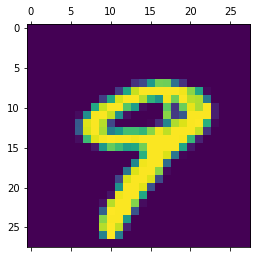

In [55]:
plt.matshow(XTest[9])

In [56]:
# predict on Test values
YPred=model.predict(XTest)
YPred[9]

313/313 [==============================] - 1s 3ms/step


array([3.05707343e-02, 1.44490913e-01, 1.23612344e-01, 4.80987355e-02,
       9.56002474e-01, 2.09008949e-03, 3.25225756e-06, 7.43097901e-01,
       4.11051214e-02, 9.99994636e-01], dtype=float32)

In [57]:
np.argmax(YPred[10])

0

In [58]:
YPred_labels=[np.argmax(i) for i in YPred]
YPred_labels[:9]

[7, 2, 1, 0, 4, 1, 4, 9, 5]

In [59]:
confmatrix=tf.math.confusion_matrix(labels=YTest,predictions=YPred_labels)
confmatrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    0,    2,    1,    2,    1,    0,    3,    2],
       [   0, 1120,    3,    2,    0,    1,    2,    1,    6,    0],
       [   2,    0, 1021,    2,    0,    1,    0,    3,    3,    0],
       [   0,    0,    6,  984,    0,    9,    0,    5,    6,    0],
       [   0,    0,    2,    0,  970,    0,    5,    0,    0,    5],
       [   1,    0,    0,    6,    0,  883,    1,    0,    0,    1],
       [   3,    3,    0,    1,    3,   10,  932,    0,    6,    0],
       [   1,    2,   15,    0,    2,    0,    0,  997,    5,    6],
       [   0,    0,    8,    1,    3,   14,    1,    2,  943,    2],
       [   2,    3,    0,    2,   17,   10,    0,    4,    9,  962]])>

Text(69.0, 0.5, 'Actual Value')

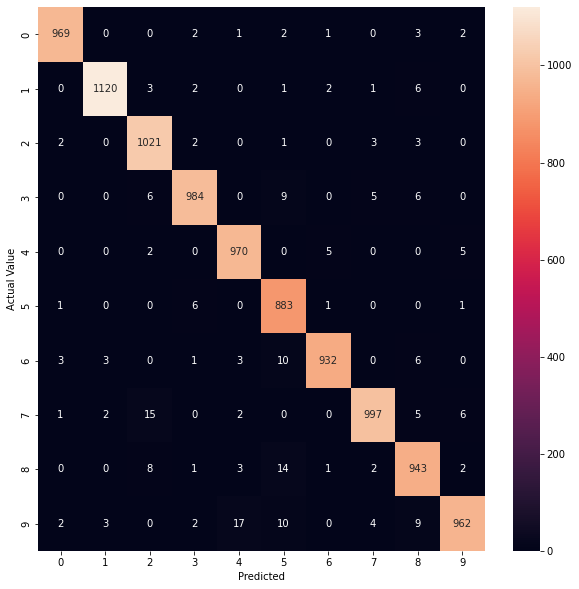

In [60]:
# heatmap
plt.figure(figsize=(10,10))
sns.heatmap(confmatrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel("Actual Value")